In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from matplotlib import style
style.use("ggplot")
import plotly.express as px
from pandas import DataFrame
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.decomposition import PCA

In [186]:
features = [
    "females",
    "males",
    "hispanic",
    "not hispanic",
    "White Alone",
    "Black or African American Alone",
    "American Indian or Alaska Native Alone",
    "Asian Alone",
    "Native Hawaiian and Other Pacific Islander Alone",
    "Two or more races",
    "Age: [0-10]",
    "Age: [11-20]",
    "Age: [21-30]",
    "Age: [31-40]",
    "Age: [41-50]",
    "Age: [51-60]",
    "Age: [61-70]",
    "Age: [71-80]",
    "Age: [81-84]",
    "Age: [85]+",
    "GDP Per Year (Normalized)",
    "Personal income per capita (Normalized)",
    "Personal Consumption expenditure per capita (Normalized)",
    "Presidential Approval Rating",
    "GOP/Total Senate Seats pre-election",
    "GOP/Total House Seats pre-election"
]

In [187]:
labels = [
    "GOP Votes/Total Votes for Presidential Election",
    "DNC Votes/Total Votes for Presidential Election",
    "1 = Voted GOP, 0 = Voted DNC"
]

In [188]:
states = ["Alaska",
          "Alabama",
          "Arkansas",
          "Arizona",
          "California",
          "Colorado",
          "Connecticut",
          "Delaware",
          "Florida",
          "Georgia",
          "Hawaii",
          "Iowa",
          "Idaho",
          "Illinois",
          "Indiana",
          "Kansas",
          "Kentucky",
          "Louisiana",
          "Massachusetts",
          "Maryland",
          "Maine",
          "Michigan",
          "Minnesota",
          "Missouri",
          "Mississippi",
          "Montana",
          "North Carolina",
          "North Dakota",
          "Nebraska",
          "New Hampshire",
          "New Jersey",
          "New Mexico",
          "Nevada",
          "New York",
          "Ohio",
          "Oklahoma",
          "Oregon",
          "Pennsylvania",
          "Rhode Island",
          "South Carolina",
          "South Dakota",
          "Tennessee",
          "Texas",
          "Utah",
          "Virginia",
          "Vermont",
          "Washington",
          "Wisconsin",
          "West Virginia",
          "Wyoming"
         ]

In [189]:
states_abbrevs = ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", 
          "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE", "NH", 
          "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV", "WY"]

In [190]:
data_df_train = pd.read_csv("combined-data_no-states_train.csv")

In [191]:
data_df_test = pd.read_csv("combined-data_no-states_test.csv")

In [192]:
X_train = np.array(data_df_train[features].values)
y_gop_train = (data_df_train[labels[0]].values.tolist())
# print(y_gop_train)
y_dnc_train = (data_df_train[labels[1]].values.tolist())
y_binary_train = (data_df_train[labels[2]].values.tolist())

# y_train = y_binary_train

y_binary_train = np.array(y_binary_train)
y_gop_train = np.array(y_gop_train)
y_dnc_train = np.array(y_dnc_train)

In [193]:
X_test = np.array(data_df_test[features].values)
y_gop_test = (data_df_test[labels[0]].values.tolist())
y_dnc_test = (data_df_test[labels[1]].values.tolist())
y_binary_test = (data_df_test[labels[2]].values.tolist())

# y_test = y_binary_test

y_binary_test = np.array(y_binary_test)
y_gop_test = np.array(y_gop_test)
y_dnc_test = np.array(y_dnc_test)

In [194]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()

encoded_gop_train = lab_enc.fit_transform(y_gop_train)
encoded_dnc_train = lab_enc.fit_transform(y_dnc_train)

encoded_gop_test = lab_enc.fit_transform(y_gop_test)
encoded_dnc_test = lab_enc.fit_transform(y_dnc_test)

In [226]:
# creating artifical neural network (ANN) for binary classifications
mlp = MLPClassifier(hidden_layer_sizes=(26,),max_iter=4000, solver = 'lbfgs', tol=.0000001)

mlp.fit(X_train,y_binary_train)
# print(y_binary_train)

predictions = mlp.predict(X_test) #generating predictions
df_states = DataFrame(states,columns=['State'])
df_y_pred = DataFrame(predictions, columns=['y_pred'])
df_y_binary_test = DataFrame(y_binary_test, columns=['y_binary_test'])
df_states_abbrevs = DataFrame(states_abbrevs, columns=['states_abbrevs'])

array5 = []
i = 0

while i < len(predictions):
    if (int(df_y_pred._get_value(i, "y_pred")) != int(df_y_binary_test._get_value(i, "y_binary_test"))):
        array5.append(0)
    else:
        array5.append(1)
    i += 1 
    
correct = pd.DataFrame(data=array5, columns=["correct"])

result = pd.concat([df_states, df_states_abbrevs, df_y_pred, df_y_binary_test, correct], axis=1)

fig2 = px.choropleth(
                    result,
                    locations=result['states_abbrevs'],
                    locationmode="USA-states",
                    color='correct',
                    color_continuous_scale="YlGn",
                    range_color=[0,1],
                    scope="usa",
                    hover_name="State")
# fig2.update_geos(fitbounds='locations', visible=False)
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2.show()

print(confusion_matrix(y_binary_test,predictions))

print(classification_report(y_binary_test,predictions))

[[18  7]
 [ 3 22]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.76      0.88      0.81        25

    accuracy                           0.80        50
   macro avg       0.81      0.80      0.80        50
weighted avg       0.81      0.80      0.80        50



In [280]:
# creating artificial neural network (ANN) for GOP percentages of vote
# mlp = MLPRegressor(hidden_layer_sizes=(26,),max_iter=1000000, solver = 'adam', tol=.0000001)
mlp = MLPRegressor(max_iter=10000, solver = 'sgd', activation = 'logistic', hidden_layer_sizes=(26,), 
                   learning_rate = 'adaptive', momentum = .97, 
                   nesterovs_momentum=True, learning_rate_init=.0001, shuffle = True)
# mlp = MLPRegressor()
mlp.fit(X_train,y_gop_train)

predictions = mlp.predict(X_test) #generating predictions

print(mlp.score(X_test, y_gop_test))

-24.103753956845253


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.



In [230]:
# creating artificial neural network (ANN) for DNC percentages of vote
mlp = MLPRegressor(hidden_layer_sizes=(26,26),max_iter=4000, alpha=1e-5, solver = 'lbfgs', tol=.000000001)
mlp.fit(X_train,y_dnc_train)

predictions = mlp.predict(X_test) #generating predictions

print(mlp.score(X_test, y_dnc_test))

-21.233081994744925



learning on dataset iris
training: number1
Training set score: 0.966667
Training set loss: 0.294423
training: number2
Training set score: 0.980000
Training set loss: 0.048796
training: number3
Training set score: 0.973333
Training set loss: 0.081254
training: number4
Training set score: 0.953333
Training set loss: 0.151670
training: number5
Training set score: 0.973333
Training set loss: 0.150539

learning on dataset loss curves
training: number1
[[15 10]
 [ 3 22]]
              precision    recall  f1-score   support

           0       0.83      0.60      0.70        25
           1       0.69      0.88      0.77        25

    accuracy                           0.74        50
   macro avg       0.76      0.74      0.73        50
weighted avg       0.76      0.74      0.73        50



Training set score: 0.810000
Training set loss: 0.432059
training: number2
[[24  1]
 [24  1]]
              precision    recall  f1-score   support

           0       0.50      0.96      0.66        25
           1       0.50      0.04      0.07        25

    accuracy                           0.50        50
   macro avg       0.50      0.50      0.37        50
weighted avg       0.50      0.50      0.37        50



Training set score: 0.990000
Training set loss: 0.045710
training: number3
[[19  6]
 [14 11]]
              precision    recall  f1-score   support

           0       0.58      0.76      0.66        25
           1       0.65      0.44      0.52        25

    accuracy                           0.60        50
   macro avg       0.61      0.60      0.59        50
weighted avg       0.61      0.60      0.59        50



Training set score: 0.930000
Training set loss: 0.185363
training: number4
[[16  9]
 [ 3 22]]
              precision    recall  f1-score   support

           0       0.84      0.64      0.73        25
           1       0.71      0.88      0.79        25

    accuracy                           0.76        50
   macro avg       0.78      0.76      0.76        50
weighted avg       0.78      0.76      0.76        50



Training set score: 0.870000
Training set loss: 0.361763
training: number5
[[18  7]
 [ 5 20]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.74      0.80      0.77        25

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.76      0.76      0.76        50



Training set score: 0.900000
Training set loss: 0.356612


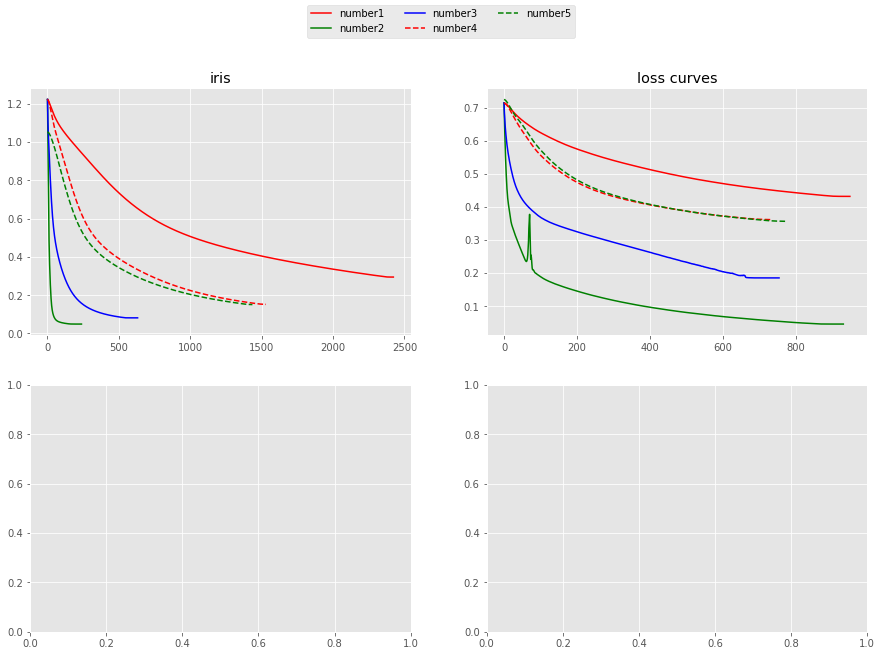

In [200]:
import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [
          {'solver': 'sgd', 'hidden_layer_sizes':(26,), 'learning_rate': 'adaptive',
           'power_t':0.2, 'momentum': .9},
          {'solver': 'sgd', 'hidden_layer_sizes':(26,),'learning_rate': 'adaptive', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'hidden_layer_sizes':(26,),'learning_rate': 'adaptive', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'hidden_layer_sizes':(26,),'learning_rate': 'adaptive', 'momentum': .97,
           'nesterovs_momentum': True, 'learning_rate_init': 0.001},
          {'solver': 'sgd', 'learning_rate': 'adaptive', 'momentum': .97,
           'nesterovs_momentum': True, 'learning_rate_init': 0.001}        
          ]

labels = [
          "number1", "number2", "number3", "number4", "number5" 
          ]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'}]

def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 4000

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0,
                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)
            if name == "loss curves":
              predictions = mlp.predict(X_test) #generating predictions
              print(confusion_matrix(y_binary_test,predictions))
              print(classification_report(y_binary_test,predictions))
        
              df_states = DataFrame(states,columns=['State'])
              df_y_pred = DataFrame(predictions, columns=['y_pred'])
              df_y_binary_test = DataFrame(y_binary_test, columns=['y_binary_test'])
              df_states_abbrevs = DataFrame(states_abbrevs, columns=['states_abbrevs'])

              array5 = []
              i = 0

              while i < len(predictions):
                  if (int(df_y_pred._get_value(i, "y_pred")) != int(df_y_binary_test._get_value(i, "y_binary_test"))):
                      array5.append(0)
                  else:
                      array5.append(1)
                  i += 1 
                  
              correct = pd.DataFrame(data=array5, columns=["correct"])

              result = pd.concat([df_states, df_states_abbrevs, df_y_pred, df_y_binary_test, correct], axis=1)
              
              fig2 = px.choropleth(
                                  result,
                                  locations=result['states_abbrevs'],
                                  locationmode="USA-states",
                                  color='correct',
                                  color_continuous_scale="YlGn",
                                  range_color=[0,1],
                                  scope="usa",
                                  hover_name="State")
              # fig2.update_geos(fitbounds='locations', visible=False)
              fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
              fig2.show()

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
data_sets = [(iris.data, iris.target),
             (X_train, y_binary_train)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris','loss curves']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()


learning on dataset iris
training: constant learning-rate
Training set score: 0.920420
Training set loss: 0.026584
training: constant with momentum
Training set score: 0.949775
Training set loss: 0.016791
training: constant with Nesterov's momentum
Training set score: 0.944545
Training set loss: 0.018519
training: inv-scaling learning-rate
Training set score: 0.558157
Training set loss: 0.147381
training: inv-scaling with momentum
Training set score: 0.245806
Training set loss: 0.257159
training: inv-scaling with Nesterov's momentum
Training set score: -0.543119
Training set loss: 0.863668
training: adam
Training set score: 0.930635
Training set loss: 0.023198

learning on dataset election
training: constant learning-rate
Training set score: 0.298887
Training set loss: 0.005097
training: constant with momentum
Training set score: -0.126800
Training set loss: 0.007989
training: constant with Nesterov's momentum
Training set score: -0.171495
Training set loss: 0.010726
training: inv-sca

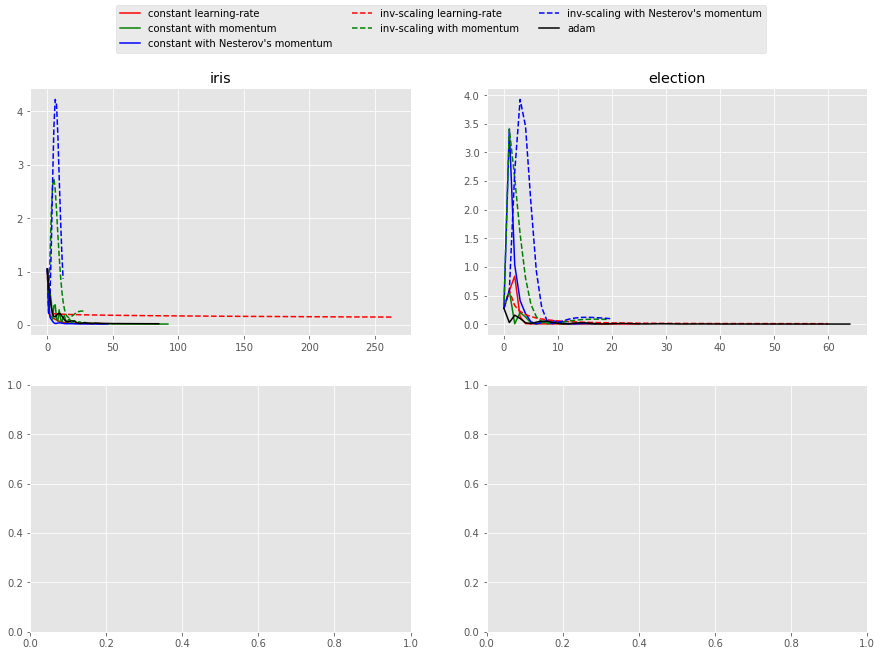

In [199]:
#Graphing loss functions for the GOP Regressor

import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 4000

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPRegressor(random_state=0,
                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)
            # if name == "election":
            #   predictions = mlp.predict(X_test) #generating predictions
            #   print(confusion_matrix(y_binary_test,predictions))
            #   print(classification_report(y_binary_test,predictions))

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
data_sets = [(iris.data, iris.target),
             (X_train, y_gop_train)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris','election']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()